In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import sys

sys.path.append(
    "/Users/mateo/Documents/Máster Big Data/TFM/codes/urbana-barcelona-master/src"
)

In [2]:
import papermill as pm 

pm.execute_notebook('01linear.ipynb', '/dev/null')
pm.execute_notebook('02gwr.ipynb', '/dev/null')
pm.execute_notebook('08_mesf.ipynb', '/dev/null')
pm.execute_notebook('05_0_svr_rbf.ipynb', '/dev/null')
pm.execute_notebook('05_0_svr_linear.ipynb', '/dev/null')
pm.execute_notebook('06_1_gwsvr.ipynb', '/dev/null')

Executing:   0%|          | 0/66 [00:00<?, ?cell/s]

/Users/mateo/anaconda3/envs/urbana/lib/python3.12/site-packages/papermill/iorw.py:149: UserWarning: the file is not specified with any extension : null
  warnings.warn(f"the file is not specified with any extension : {os.path.basename(path)}")
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Executing:   0%|          | 0/76 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Executing:   0%|          | 0/42 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Executing:   0%|          | 0/27 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


{'cells': [{'cell_type': 'markdown',
   'metadata': {'tags': [],
    'papermill': {'exception': False,
     'start_time': '2024-08-22T08:03:28.408581',
     'end_time': '2024-08-22T08:03:28.415880',
     'duration': 0.007299,
     'status': 'completed'}},
   'source': 'This notebook uses cvxpy library (it has been installed on urbana package, so it should be updated in order to use the entire program)',
   'id': '8e15c96b'},
  {'cell_type': 'code',
   'execution_count': 1,
   'metadata': {'tags': [],
    'papermill': {'exception': False,
     'start_time': '2024-08-22T08:03:28.421157',
     'end_time': '2024-08-22T08:03:28.492206',
     'duration': 0.071049,
     'status': 'completed'},
    'execution': {'iopub.status.busy': '2024-08-22T08:03:28.425726Z',
     'iopub.execute_input': '2024-08-22T08:03:28.426119Z',
     'iopub.status.idle': '2024-08-22T08:03:28.491212Z',
     'shell.execute_reply': '2024-08-22T08:03:28.490937Z'}},
   'outputs': [],
   'source': '%load_ext lab_black',
   

In [3]:
SAVE_FIGS = False

from urbana.constants import DIR_DATA

VARIABLE_TO_PREDICT = "Airbnb_Number"
YEAR = 2023 
MONTH = 12

DIR_VAR = DIR_DATA / "processed/{}".format(VARIABLE_TO_PREDICT)
DIR_MONTH = DIR_VAR / "{}_{:02d}".format(YEAR, MONTH)
DIR_RESULTS = DIR_MONTH / "00_results"

In [4]:
geo_info = gpd.read_file(DIR_DATA / "interim/sections_geo.json")
geo_info.set_index("Tag", inplace=True)

In [5]:
df_metrics = pd.read_csv("metrics.csv", index_col=0)
df_metrics

,MSE,RMSE,R^2,Adj R^2,EVs,AIC
Linear Regression,119.908203,10.950260,0.818644,0.803146,0.818644,5280.223871
GWR,128.109551,11.318549,0.806239,0.789682,0.808532,1529.338979
MESF-Queen,115.669618,10.754981,0.825054,0.808153,0.825054,5261.788195
MESF-KNN,116.309755,10.784700,0.824086,0.807091,0.824086,5267.682404
MESF-Gabriel,114.353896,10.693638,0.827044,0.810335,0.827044,5249.570252
RBF SVR,0.914437,0.956262,0.998617,0.998499,0.998676,72.470973
Linear SVR,156.329967,12.503198,0.763557,0.743352,0.766012,5563.502835
GWSVR,158.500488,12.589698,0.760274,0.739789,0.762627,5578.229196


In [6]:
def dataframe_to_latex(df, label, caption):

    df_cols = []


    latex_code = "\\begin{table}[H]\n\\centering\n"
    latex_code += f"\\caption{{{caption}}}\n"
    latex_code += f"\\label{{{label}}}\n"
    latex_code += "\\begin{tabular}{p{3.5cm} p{2.5cm} p{2.5cm} p{2.5cm} p{2.5cm}}\n"
    latex_code += "\\toprule\n"
    latex_code += " Model"

    for col in df.columns: 
        if col == 'Adj R^2':
            latex_code += " & \\textbf{Adj R\\textsuperscript{2}}"
        else: 
            latex_code += " & "  + f"\\textbf{{{col}}}"
    #latex_code += " \\\\\n"
    latex_code += " & ".join([f"\\textbf{{{col}}}" for col in df_cols]) + " \\\\\n"
    latex_code += "\\midrule\n"
    for index, row in df.iterrows():
        latex_code += index + " & " + " & ".join([str(round(item,3)) for item in row]) + " \\\\\n"
    latex_code += "\\bottomrule\n"
    latex_code += "\\end{tabular}\n"
    latex_code += "\\end{table}"
    return latex_code

metrics = ['RMSE', 'Adj R^2', 'EVs', 'AIC']
latex_code = dataframe_to_latex(df_metrics[metrics], "tab:model_perf_comparison", "Model Performance Comparison")
print(latex_code)

\begin{table}[H]
\centering
\caption{Model Performance Comparison}
\label{tab:model_perf_comparison}
\begin{tabular}{p{3.5cm} p{2.5cm} p{2.5cm} p{2.5cm} p{2.5cm}}
\toprule
 Model & \textbf{RMSE} & \textbf{Adj R\textsuperscript{2}} & \textbf{EVs} & \textbf{AIC} \\
\midrule
Linear Regression & 10.95 & 0.803 & 0.819 & 5280.224 \\
GWR & 11.319 & 0.79 & 0.809 & 1529.339 \\
MESF-Queen & 10.755 & 0.808 & 0.825 & 5261.788 \\
MESF-KNN & 10.785 & 0.807 & 0.824 & 5267.682 \\
MESF-Gabriel & 10.694 & 0.81 & 0.827 & 5249.57 \\
RBF SVR & 0.956 & 0.998 & 0.999 & 72.471 \\
Linear SVR & 12.503 & 0.743 & 0.766 & 5563.503 \\
GWSVR & 12.59 & 0.74 & 0.763 & 5578.229 \\
\bottomrule
\end{tabular}
\end{table}


In [7]:
df_metrics_red = pd.read_csv("metrics_red.csv", index_col=0)
df_metrics_red

,MSE,RMSE,R^2,Adj R^2,EVs,AIC
Linear Regression,160.004466,12.649287,0.757999,0.753377,0.762458,5460.315447
GWR,92.873596,9.637095,0.859532,0.858738,0.862931,1481.899846
MESF-Queen,151.535571,12.309979,0.770808,0.748666,0.770808,5550.236174
MESF-KNN,149.073928,12.209583,0.774531,0.752749,0.774531,5532.744424
MESF-Gabriel,147.121775,12.129377,0.777484,0.755987,0.777484,5518.666371
RBF SVR,37.509157,6.124472,0.943269,0.938421,0.944206,4039.056882
Linear SVR,201.036832,14.178746,0.695940,0.669957,0.700455,5832.125326
GWSVR,221.598323,14.886179,0.664841,0.636201,0.671017,5936.125302


In [8]:
metrics = ['RMSE', 'Adj R^2', 'EVs', 'AIC']
latex_code = dataframe_to_latex(df_metrics_red[metrics], "tab:red_model_perf_comparison", "Reduced Models Performance Comparison")
print(latex_code)

\begin{table}[H]
\centering
\caption{Reduced Models Performance Comparison}
\label{tab:red_model_perf_comparison}
\begin{tabular}{p{3.5cm} p{2.5cm} p{2.5cm} p{2.5cm} p{2.5cm}}
\toprule
 Model & \textbf{RMSE} & \textbf{Adj R\textsuperscript{2}} & \textbf{EVs} & \textbf{AIC} \\
\midrule
Linear Regression & 12.649 & 0.753 & 0.762 & 5460.315 \\
GWR & 9.637 & 0.859 & 0.863 & 1481.9 \\
MESF-Queen & 12.31 & 0.749 & 0.771 & 5550.236 \\
MESF-KNN & 12.21 & 0.753 & 0.775 & 5532.744 \\
MESF-Gabriel & 12.129 & 0.756 & 0.777 & 5518.666 \\
RBF SVR & 6.124 & 0.938 & 0.944 & 4039.057 \\
Linear SVR & 14.179 & 0.67 & 0.7 & 5832.125 \\
GWSVR & 14.886 & 0.636 & 0.671 & 5936.125 \\
\bottomrule
\end{tabular}
\end{table}


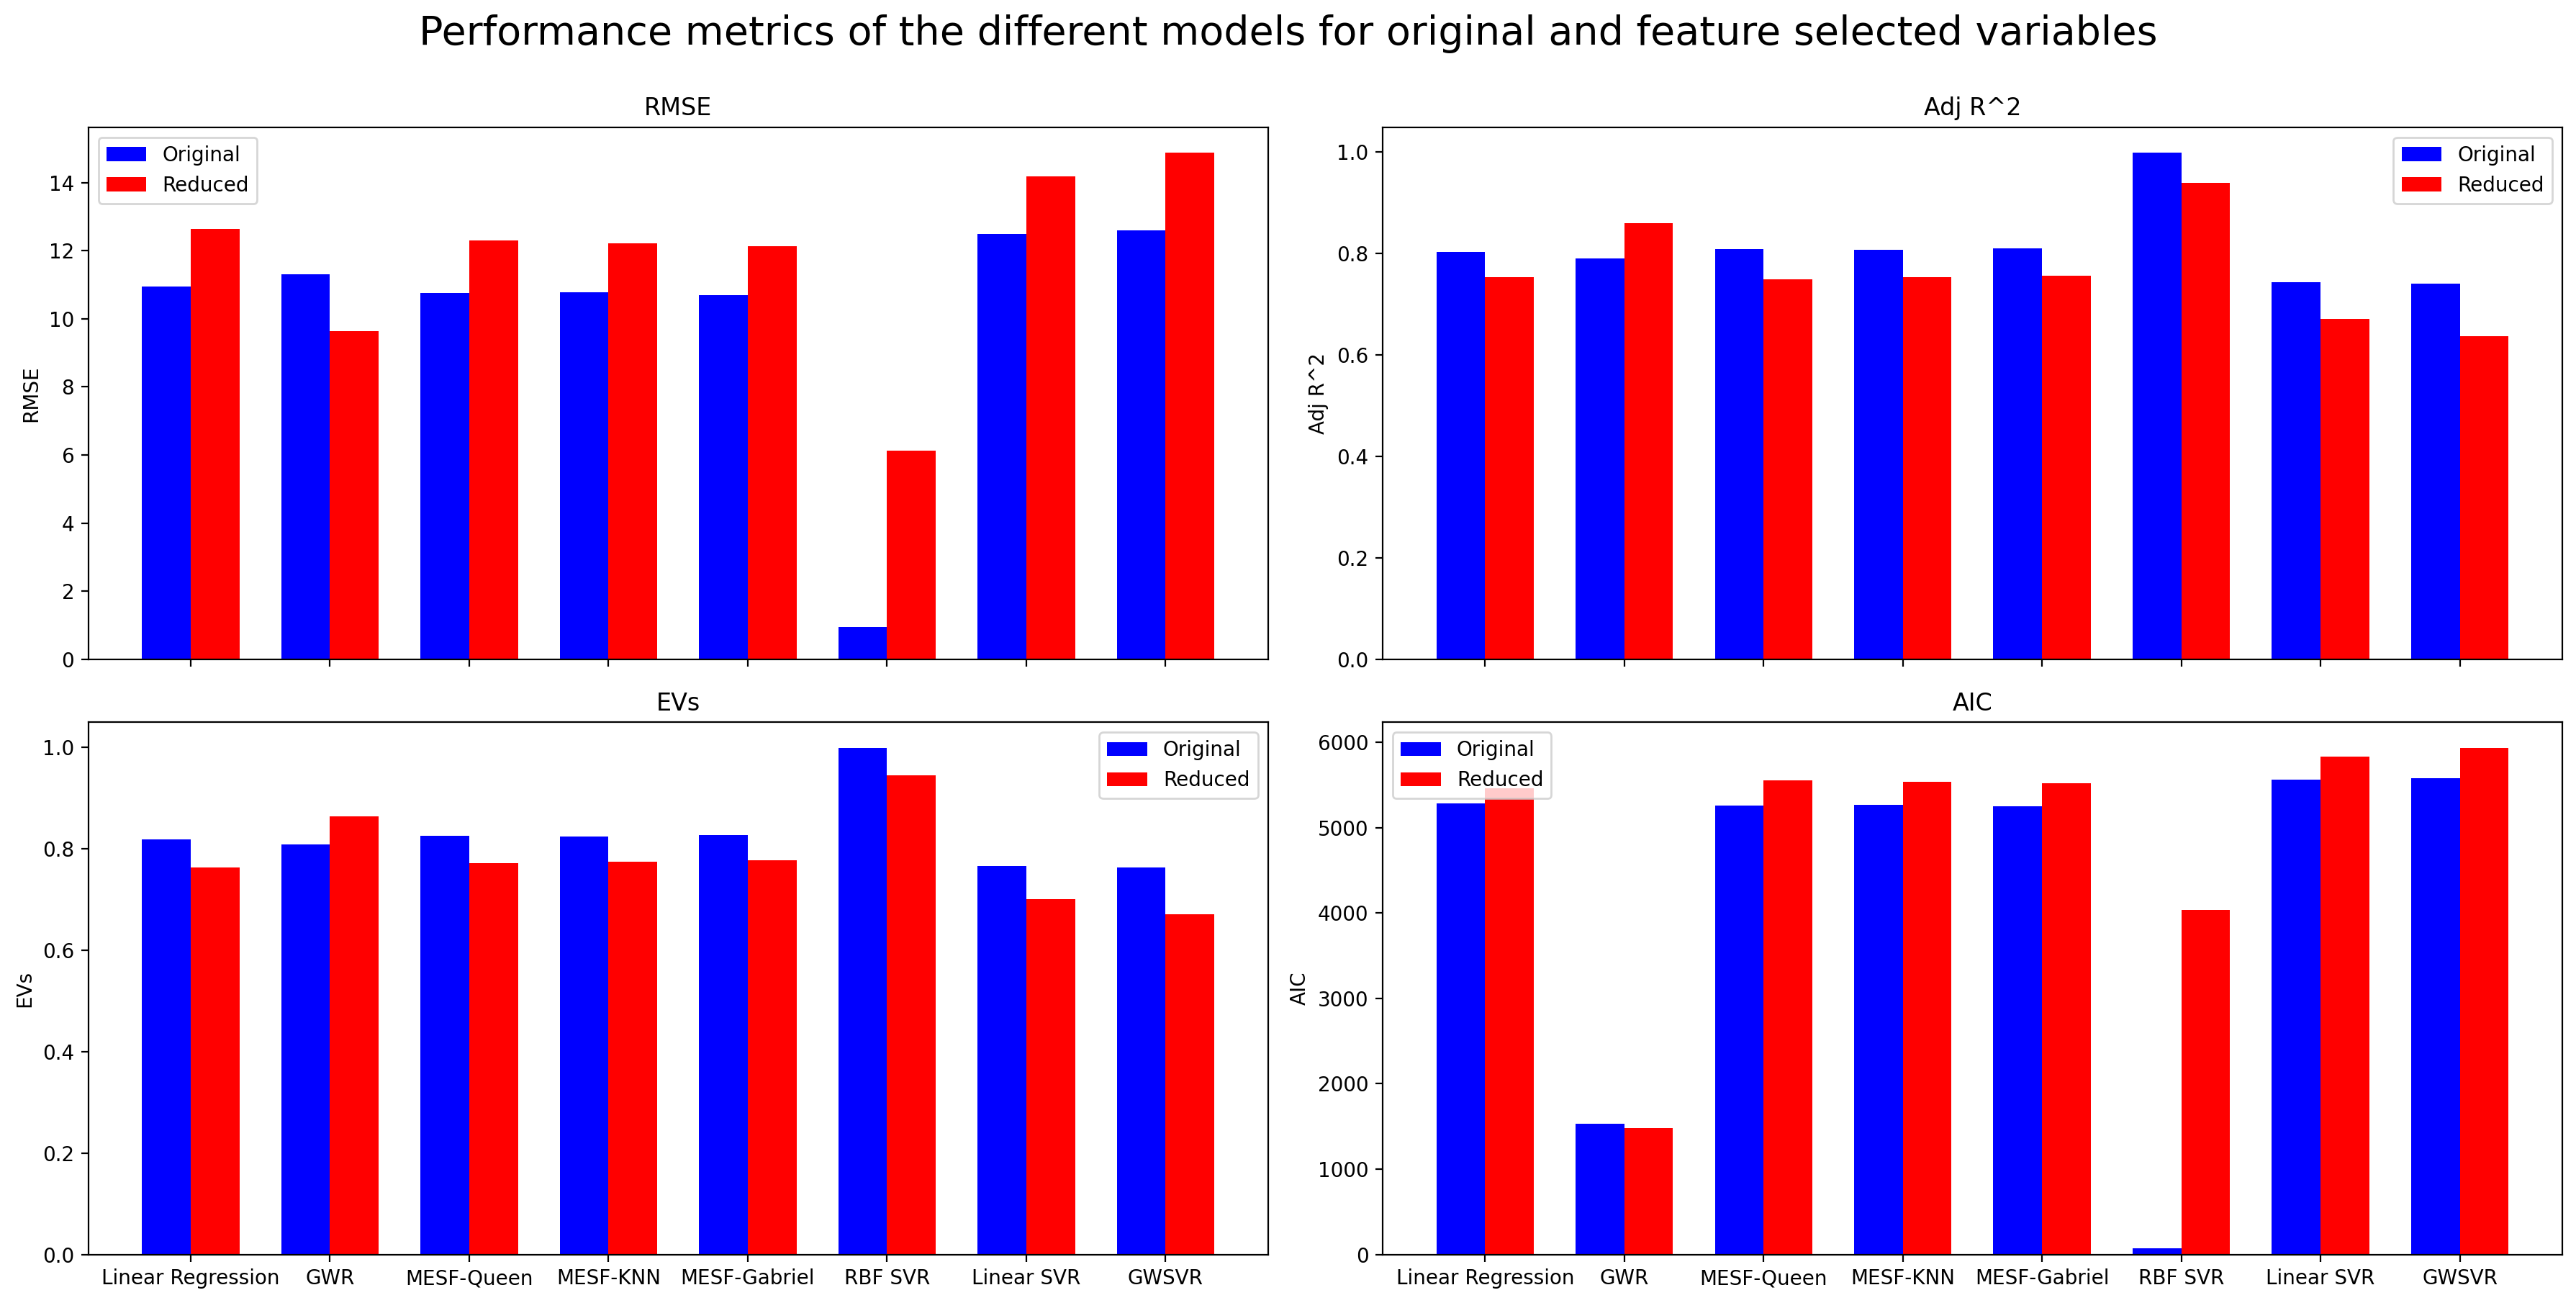

In [9]:
metrics = ['RMSE', 'Adj R^2', 'EVs', 'AIC']

fig, axs = plt.subplots(2, 2, figsize=(18, 9), sharex=True)
fig.suptitle('Performance metrics of the different models for original and feature selected variables', fontsize=20, y=1)
colors = {'df_metrics': 'blue', 'df_metrics_red': 'red'}

axs = axs.flatten()
for i, metric in enumerate(metrics):
    bar_width = 0.35
    index = df_metrics.index.tolist()

    original_data = []
    reduced_data = []
    
    for model in index:
        if model in df_metrics.index:
            original_data.append(df_metrics.loc[model, metric])
        else:
            original_data.append(None)
            
        if model in df_metrics_red.index:
            reduced_data.append(df_metrics_red.loc[model, metric])
        else:
            reduced_data.append(None)
    
    bar_positions = list(range(len(index)))
    
    axs[i].bar([p - bar_width/2 for p in bar_positions if original_data[bar_positions.index(p)] is not None],
               [d for d in original_data if d is not None],
               bar_width, color=colors['df_metrics'], label='Original')
    
    axs[i].bar([p + bar_width/2 for p in bar_positions if reduced_data[bar_positions.index(p)] is not None],
               [d for d in reduced_data if d is not None],
               bar_width, color=colors['df_metrics_red'], label='Reduced')
    
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].legend()

    axs[i].set_xticks(bar_positions)
    axs[i].set_xticklabels(index, rotation=0, ha='center')

plt.tight_layout()

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "metrics_performance.png", format="png")

plt.show()


Explicar bien que aquí se están aplicando las métricas a todo el dataset, y que las variables escogidas han sido con Linear Regression prediciendo. 

In [10]:
# metrics = ['RMSE', 'Adj R^2', 'EVs', 'AIC']

# fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True)
# colors = {'df_metrics': 'blue', 'df_metrics_red': 'red'}

# axs = axs.flatten()
# for i, metric in enumerate(metrics):
#     axs[i].plot(df_metrics.index, df_metrics[metric], marker='o', color=colors['df_metrics'], label='Original')
#     axs[i].plot(df_metrics_red.index, df_metrics_red[metric], marker='o', color=colors['df_metrics_red'], label='Reduced')
    
#     axs[i].set_title(metric)
#     axs[i].set_ylabel(metric)
#     axs[i].legend()

#     axs[i].set_xticks(range(len(df_metrics.index)))
#     axs[i].set_xticklabels(df_metrics.index, rotation=45)

# #fig.delaxes(axs[-1])

# plt.tight_layout()
# plt.show()

In [11]:
df_metrics_autocorr = pd.read_csv("metrics_autocorr.csv", index_col=0)
df_metrics_autocorr

,Moran's I,Mean MSE
Linear Regression,0.133607,181.599291
GWR,0.091858,192.927322
MESF-Queen,0.110892,275.651324
MESF-KNN,0.093927,215.337178
MESF-Gabriel,0.050416,253.331825
RBF SVR,0.098604,280.698096
Linear SVR,0.283638,188.168266
GWSVR,0.284684,NaN


In [12]:
metrics = ["Moran's I", "Mean MSE"]
latex_code = dataframe_to_latex(df_metrics_autocorr[metrics], "tab:model_autocorr_comparison", "Models Autocorrelation Handling Comparison")
print(latex_code)

\begin{table}[H]
\centering
\caption{Models Autocorrelation Handling Comparison}
\label{tab:model_autocorr_comparison}
\begin{tabular}{p{3.5cm} p{2.5cm} p{2.5cm} p{2.5cm} p{2.5cm}}
\toprule
 Model & \textbf{Moran's I} & \textbf{Mean MSE} \\
\midrule
Linear Regression & 0.134 & 181.599 \\
GWR & 0.092 & 192.927 \\
MESF-Queen & 0.111 & 275.651 \\
MESF-KNN & 0.094 & 215.337 \\
MESF-Gabriel & 0.05 & 253.332 \\
RBF SVR & 0.099 & 280.698 \\
Linear SVR & 0.284 & 188.168 \\
GWSVR & 0.285 & nan \\
\bottomrule
\end{tabular}
\end{table}


In [13]:
df_metrics_autocorr_red = pd.read_csv("metrics_autocorr_red.csv", index_col=0)
df_metrics_autocorr_red

,Moran's I,Mean MSE
Linear Regression,0.214738,178.444837
GWR,0.101605,120.867957
MESF-Queen,0.224924,252.064666
MESF-KNN,0.176038,236.256972
MESF-Gabriel,0.151428,255.266136
RBF SVR,0.122126,295.315257
Linear SVR,0.421476,205.341598
GWSVR,0.505956,NaN


In [14]:
metrics = ["Moran's I", "Mean MSE"]
latex_code = dataframe_to_latex(df_metrics_autocorr_red[metrics], "tab:red_model_autocorr_comparison", "Reduced Models Autocorrelation Handling Comparison")
print(latex_code)

\begin{table}[H]
\centering
\caption{Reduced Models Autocorrelation Handling Comparison}
\label{tab:red_model_autocorr_comparison}
\begin{tabular}{p{3.5cm} p{2.5cm} p{2.5cm} p{2.5cm} p{2.5cm}}
\toprule
 Model & \textbf{Moran's I} & \textbf{Mean MSE} \\
\midrule
Linear Regression & 0.215 & 178.445 \\
GWR & 0.102 & 120.868 \\
MESF-Queen & 0.225 & 252.065 \\
MESF-KNN & 0.176 & 236.257 \\
MESF-Gabriel & 0.151 & 255.266 \\
RBF SVR & 0.122 & 295.315 \\
Linear SVR & 0.421 & 205.342 \\
GWSVR & 0.506 & nan \\
\bottomrule
\end{tabular}
\end{table}


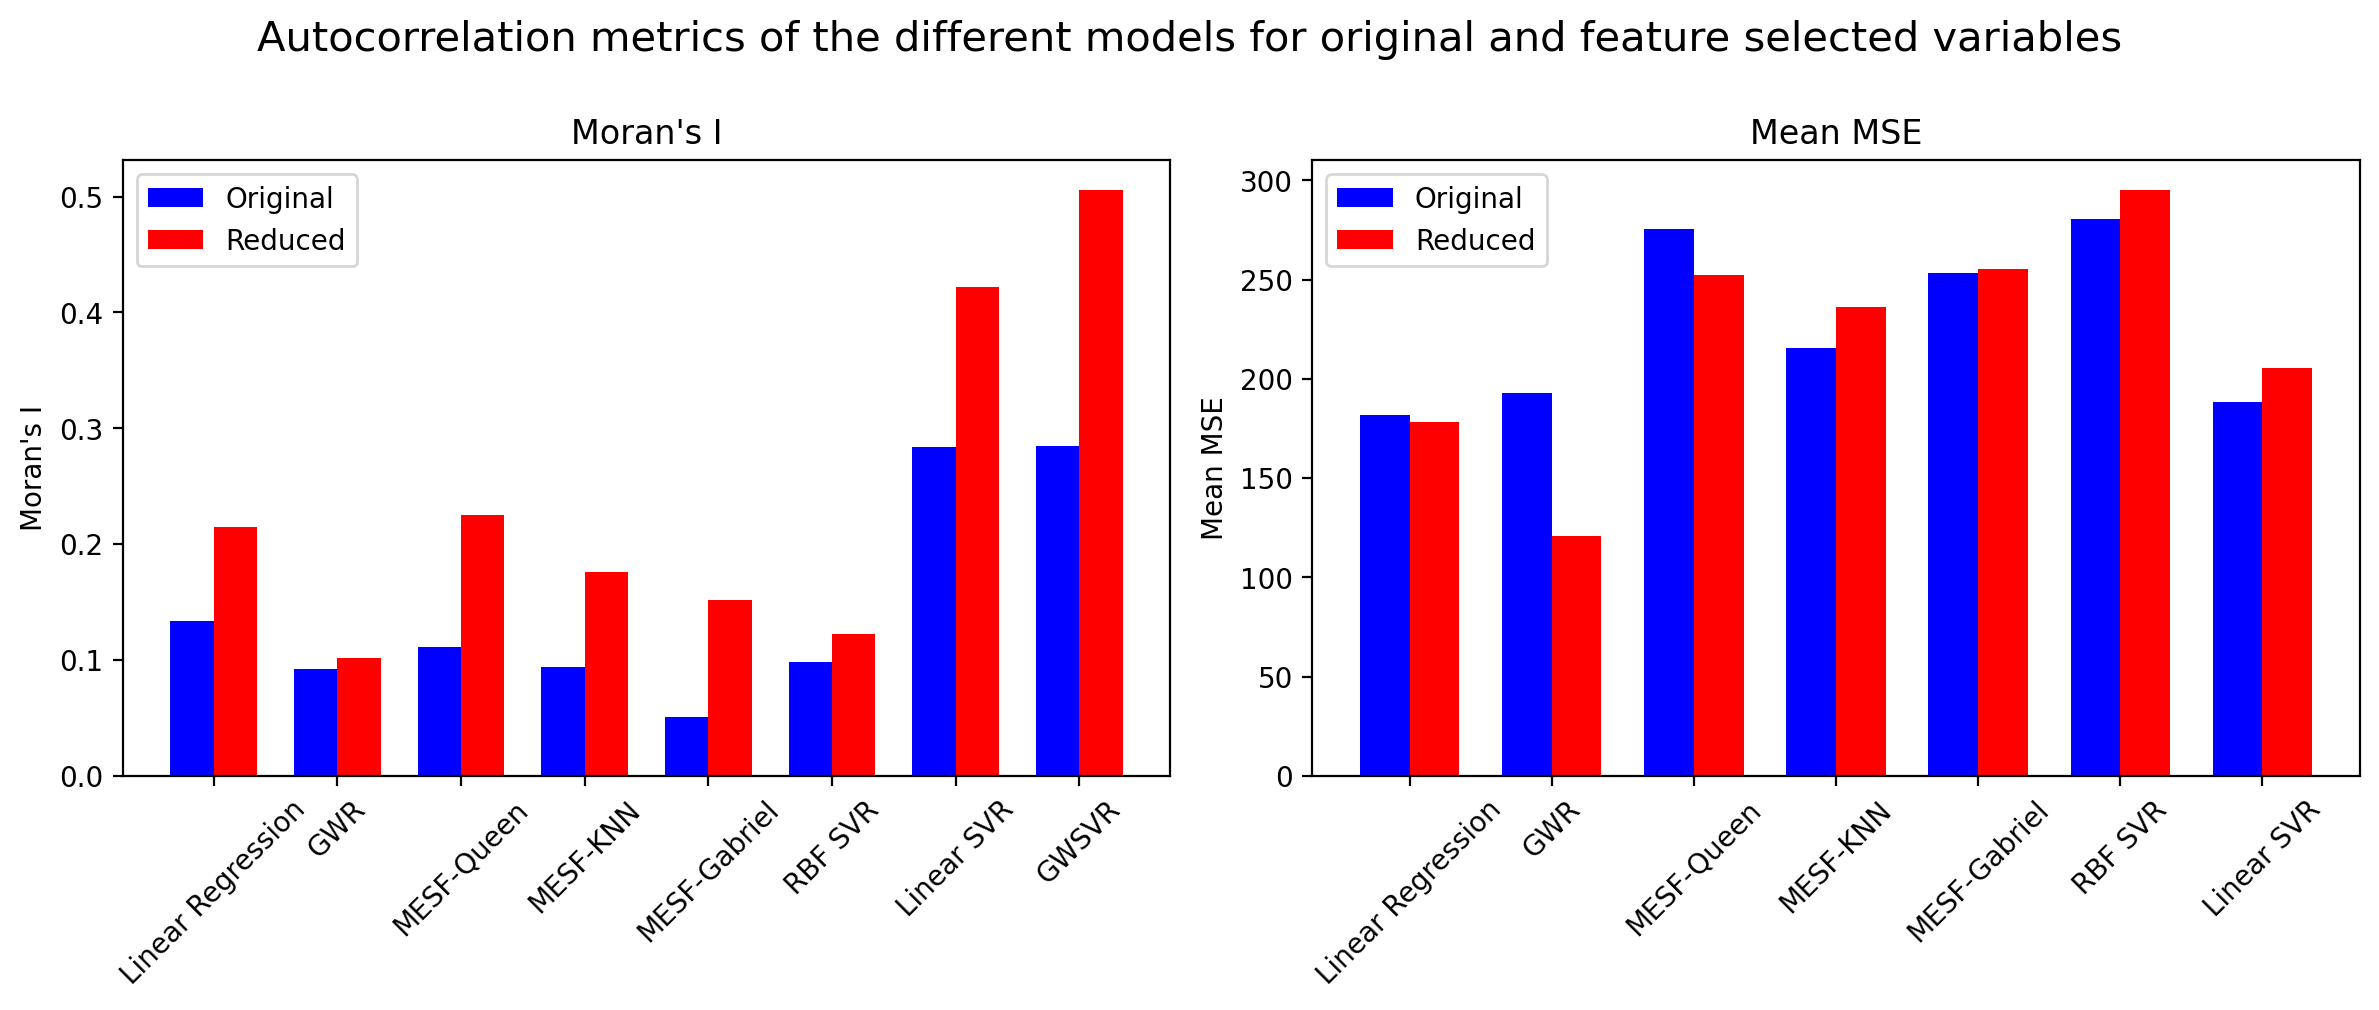

In [15]:
metrics = ["Moran's I", "Mean MSE"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=False)
fig.suptitle('Autocorrelation metrics of the different models for original and feature selected variables', fontsize=15, y=1)
colors = {'df_metrics_autocorr': 'blue', 'df_metrics_autocorr_red': 'red'}

axs = axs.flatten()
for i, metric in enumerate(metrics):
    bar_width = 0.35
    
    if metric == "Mean MSE":
        index = [model for model in df_metrics.index.tolist() if model != "GWSVR"]
    else:
        index = df_metrics.index.tolist()

    original_data = []
    reduced_data = []
    
    for model in index:
        if model in df_metrics_autocorr.index:
            original_data.append(df_metrics_autocorr.loc[model, metric])
        else:
            original_data.append(None)
            
        if model in df_metrics_autocorr_red.index:
            reduced_data.append(df_metrics_autocorr_red.loc[model, metric])
        else:
            reduced_data.append(None)
    
    bar_positions = list(range(len(index)))
    
    axs[i].bar([p - bar_width/2 for p in bar_positions if original_data[bar_positions.index(p)] is not None],
               [d for d in original_data if d is not None],
               bar_width, color=colors['df_metrics_autocorr'], label='Original')
    
    axs[i].bar([p + bar_width/2 for p in bar_positions if reduced_data[bar_positions.index(p)] is not None],
               [d for d in reduced_data if d is not None],
               bar_width, color=colors['df_metrics_autocorr_red'], label='Reduced')
    
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].legend()

    axs[i].set_xticks(bar_positions)
    axs[i].set_xticklabels(index, rotation=45)

plt.tight_layout()

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "metrics_autocorr.png", format="png")

plt.show()


In [16]:
# metrics = ["Moran's I",	"Mean MSE"]

# fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
# colors = {'df_metrics_autocorr': 'blue', 'df_metrics_autocorr_red': 'red'}

# axs = axs.flatten()
# for i, metric in enumerate(metrics):
#     axs[i].plot(df_metrics_autocorr.index, df_metrics_autocorr[metric], marker='o', color=colors['df_metrics_autocorr'], label='Original')
#     axs[i].plot(df_metrics_autocorr_red.index, df_metrics_autocorr_red[metric], marker='o', color=colors['df_metrics_autocorr_red'], label='Reduced')
    
#     axs[i].set_title(metric)
#     axs[i].set_ylabel(metric)
#     axs[i].legend()

#     axs[i].set_xticks(range(len(df_metrics_autocorr.index)))
#     axs[i].set_xticklabels(df_metrics_autocorr.index, rotation=45)

# plt.tight_layout()
# plt.show()

## Accuracy, errors training set

In [17]:
df_predictions = pd.read_csv('predictions.csv', index_col=0)
df_predictions_red = pd.read_csv('predictions_red.csv', index_col=0)

In [18]:
from urbana.models.plot_predictions import PredictedAccuracy

def plot_scatter_subplot(ax, y_series, yhat_series, modelname):
    pa = PredictedAccuracy(y_series, yhat_series)
    
    y_max0 = y_series.max()
    y_min0 = y_series.min()
    x_max0 = yhat_series.max()
    x_min0 = yhat_series.min()
    x_max_min0 = x_max0 - x_min0
    y_max_min0 = y_max0 - y_min0
    x_padding0 = 0.1 * x_max_min0
    y_padding0 = 0.1 * y_max_min0

    axis_min0 = min(x_min0 - x_padding0, y_min0 - y_padding0)
    axis_max0 = max(x_max0 + x_padding0, y_max0 + y_padding0)
    ax.axis("square")
    ax.set_xlim([axis_min0, axis_max0])
    ax.set_ylim([axis_min0, axis_max0])
    ax.set_xlabel("Predicted value")
    ax.set_ylabel("Real value")
    ax.set_title(
        f'{modelname}', fontsize=10
    )
    ax.scatter(yhat_series, y_series)
    ax.plot([axis_min0, axis_max0], [axis_min0, axis_max0], color="c")


def plot_error_subplot(ax, y_series, yhat_series, modelname):
    pa = PredictedAccuracy(y_series, yhat_series)
    eps = pa.eps
    
    x_max1 = yhat_series.max()
    x_min1 = yhat_series.min()
    y_max1 = eps.max()
    y_min1 = eps.min()
    x_max_min1 = x_max1 - x_min1
    y_max_min1 = y_max1 - y_min1
    x_padding1 = 0.1 * x_max_min1
    y_padding1 = 0.1 * y_max_min1

    axis_min1 = min(x_min1 - x_padding1, y_min1 - y_padding1)
    axis_max1 = max(x_max1 + x_padding1, y_max1 + y_padding1)
    ax.set_xlim([x_min1 - x_padding1, x_max1 + x_padding1])
    ax.set_ylim([-axis_max1, axis_max1])
    ax.set_xlabel("Predicted value")
    ax.set_ylabel("Error")
    ax.set_title(f'{modelname}', fontsize=10)
    ax.scatter(yhat_series, eps)
    ax.plot([axis_min1, axis_max1], [0, 0], "c--")

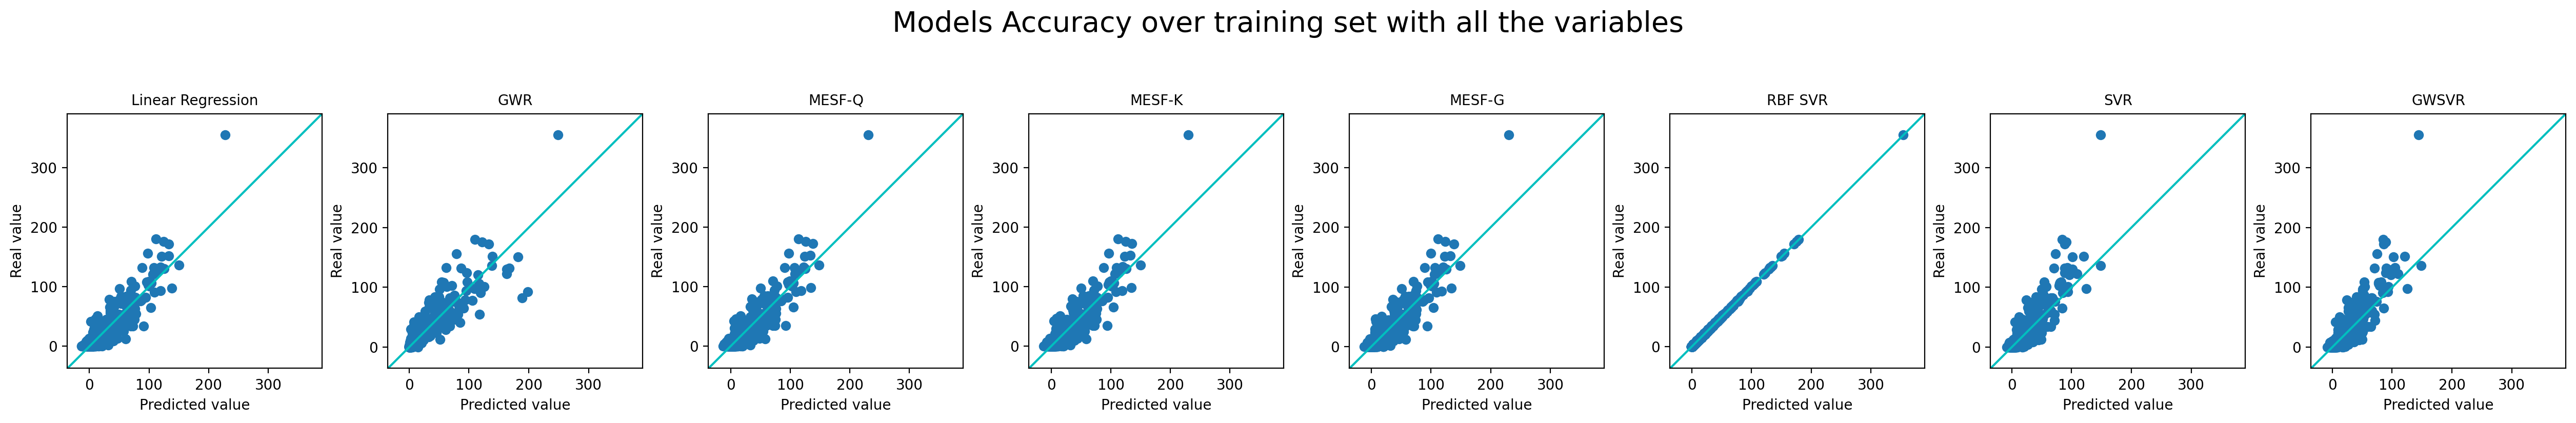

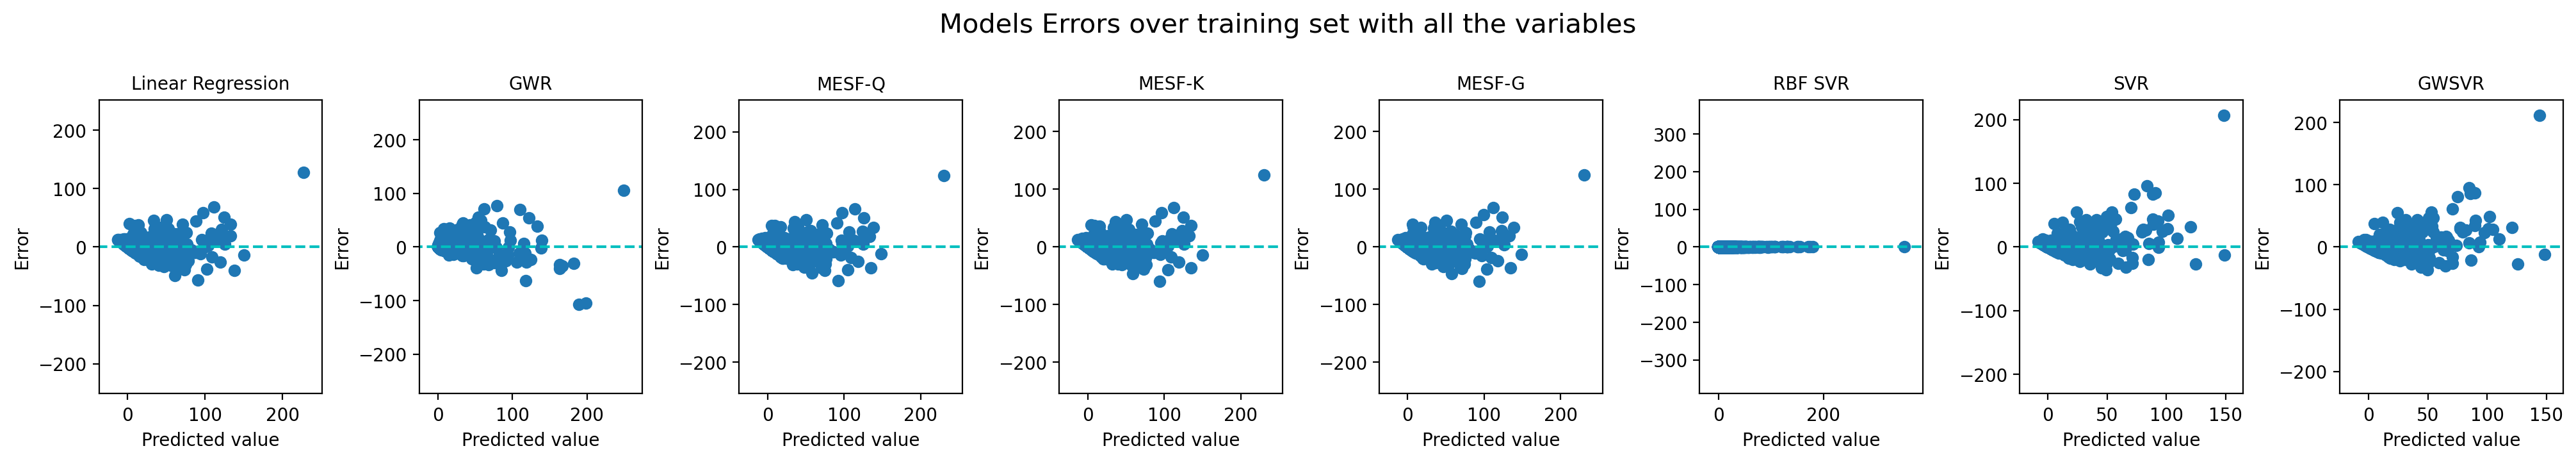

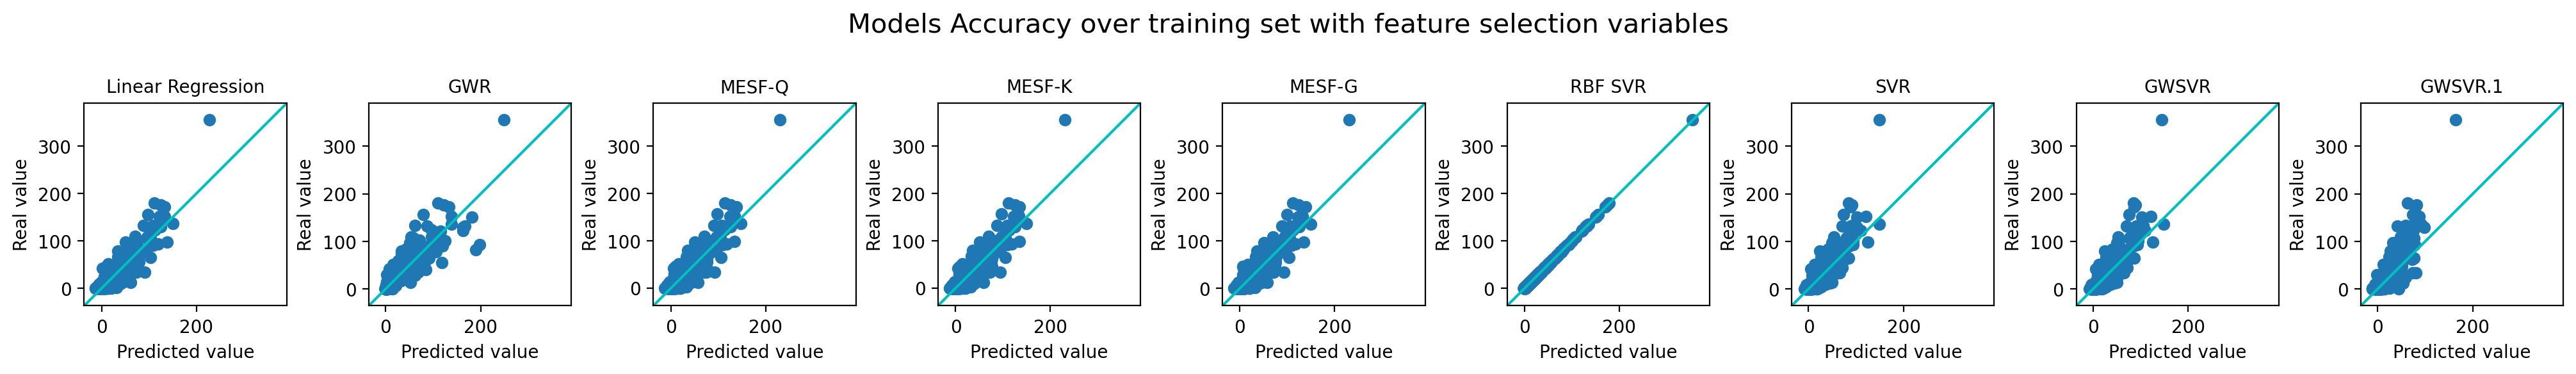

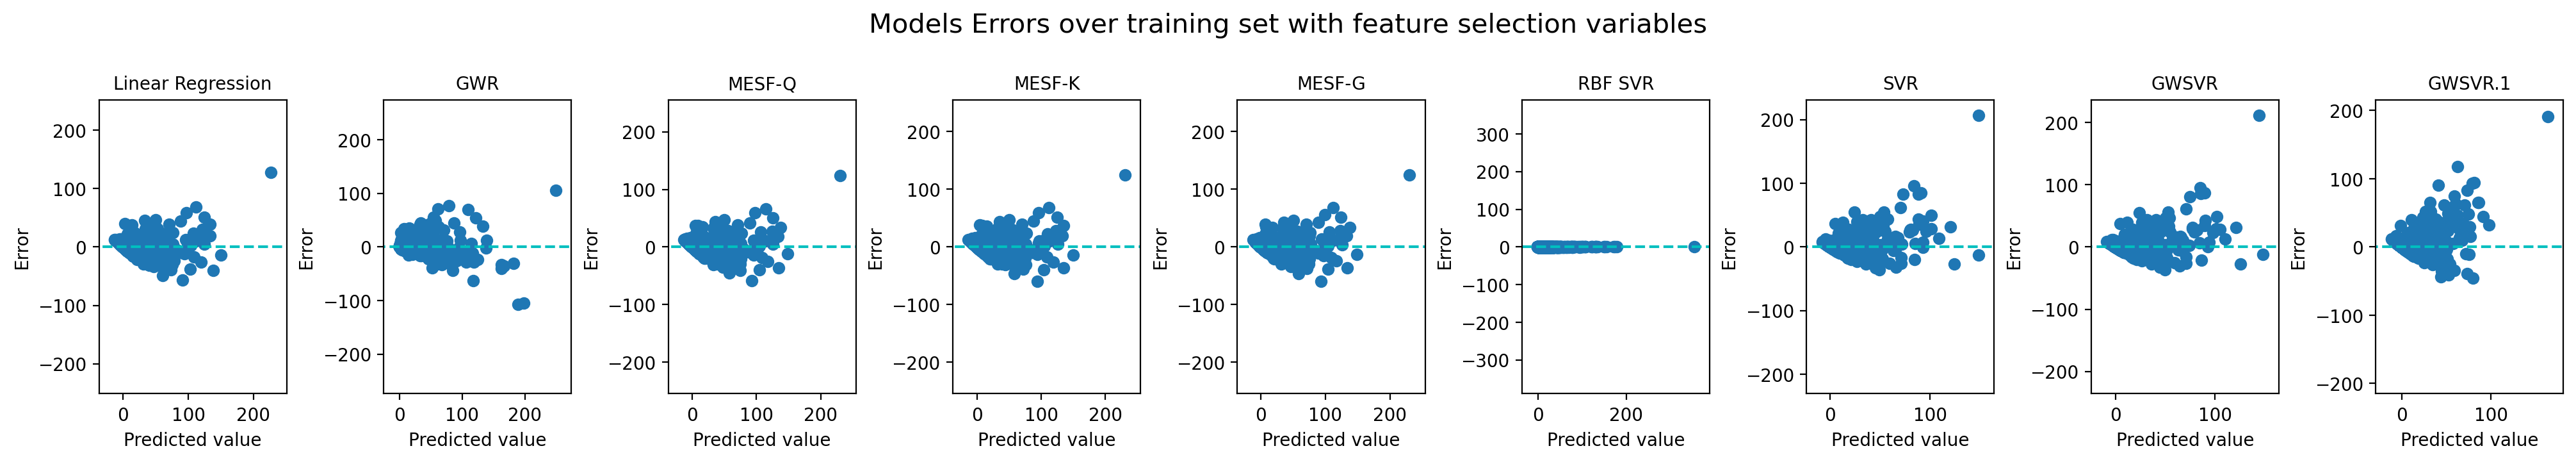

In [19]:
num_models = len(df_predictions.columns) - 1

fig1, axs1 = plt.subplots(1, num_models, figsize=(25, 5), constrained_layout=True)
fig1.suptitle('Models Accuracy over training set with all the variables', y=0.95, fontsize=20)
for i, col in enumerate(df_predictions.columns[1:]):
    y_series = df_predictions['y']
    yhat_series = df_predictions[col]
    plot_scatter_subplot(axs1[i], y_series, yhat_series, modelname=col)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "accuracy_fitting.png", format="png")
    
plt.show()

fig2, axs2 = plt.subplots(1, num_models, figsize=(20, 3), constrained_layout=True)
fig2.suptitle('Models Errors over training set with all the variables', y = 1.15, fontsize=15)
for i, col in enumerate(df_predictions.columns[1:]):
    y_series = df_predictions['y']
    yhat_series = df_predictions[col]
    plot_error_subplot(axs2[i], y_series, yhat_series, modelname=col)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "errors_fitting.png", format="png")
plt.show()

num_models = len(df_predictions_red.columns) - 1

fig3, axs3 = plt.subplots(1, num_models, figsize=(20, 5), constrained_layout=True)
fig3.suptitle('Models Accuracy over training set with feature selection variables', y=0.8, fontsize=15)
for i, col in enumerate(df_predictions_red.columns[1:]):
    y_series = df_predictions_red['y']
    yhat_series = df_predictions_red[col]
    plot_scatter_subplot(axs3[i], y_series, yhat_series, modelname=col)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "accuracy_fitting_red.png", format="png")
plt.show()

fig4, axs4 = plt.subplots(1, num_models, figsize=(20, 3), constrained_layout=True)
fig4.suptitle('Models Errors over training set with feature selection variables', y = 1.15, fontsize=15)
for i, col in enumerate(df_predictions_red.columns[1:]):
    y_series = df_predictions_red['y']
    yhat_series = df_predictions_red[col]
    plot_error_subplot(axs4[i], y_series, yhat_series, modelname=col)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "errors_fitting_red.png", format="png")
plt.show()

## Relative Errors map

In [20]:
import numpy as np

In [21]:
def plot_errors_map(ax, y, y_pred, modelname, geo_aux, errors): 
    colname = modelname + '_Error'
    geo_aux[colname] = np.array(errors)

    col_lim = max(abs(geo_aux[colname].min()), abs(geo_aux[colname].max()))

    geo_aux.plot(
        ax=ax,
        column=colname,
        legend=False,
        figsize=(20, 20),
        edgecolor="black",
        cmap="coolwarm",
        vmin=-col_lim,
        vmax=col_lim,
        legend_kwds={"shrink": 0.7},
    )
    ax.set_title(f'{modelname} model', fontsize=15, y=1.01)
    

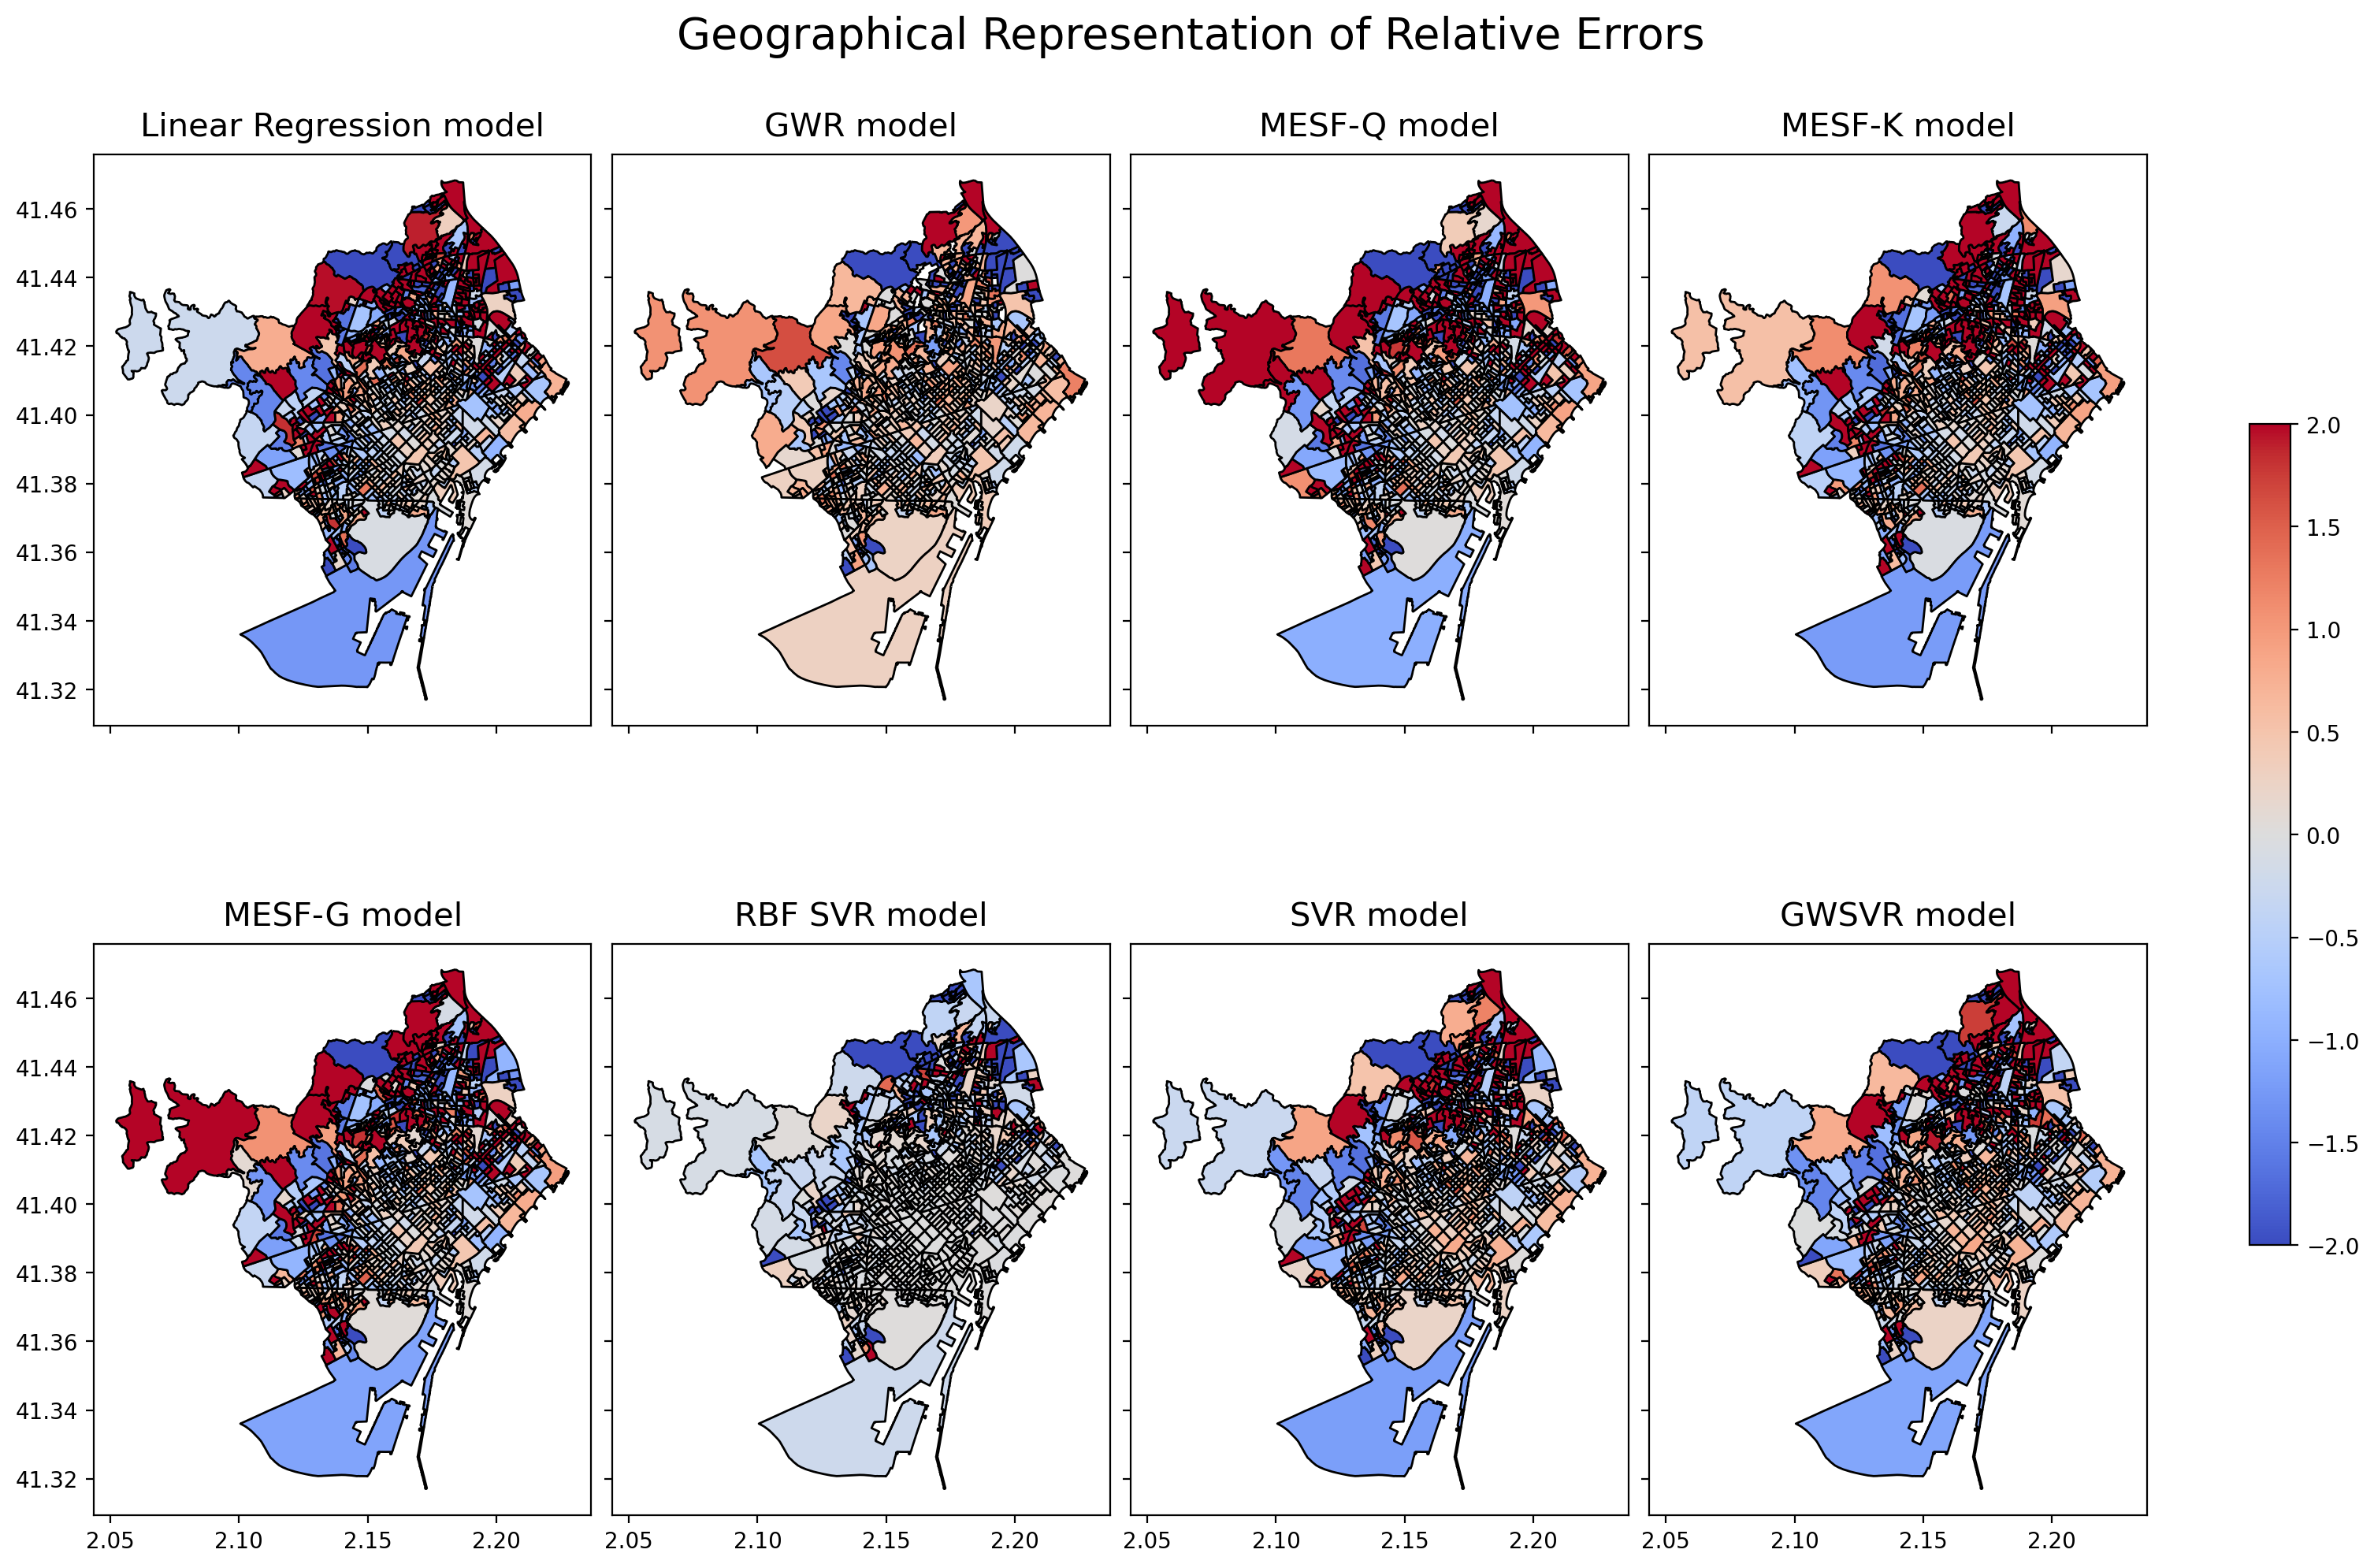

In [22]:
num_cols = 4
num_models = len(df_predictions.columns) - 1
num_rows = (num_models + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), constrained_layout=True, sharex=True, sharey=True)
fig.suptitle('Geographical Representation of Relative Errors', y=1.02, fontsize=20)
axs = axs.flatten()

all_errors=[]
for i, col in enumerate(df_predictions.columns[1:]):
    geo_aux=geo_info.copy()
    errors = 2 * (df_predictions['y'] - df_predictions[col]) / (abs(df_predictions['y']) + abs(df_predictions[col]))
    all_errors.extend(errors)
    plot_errors_map(axs[i], y=df_predictions['y'], y_pred=df_predictions[col], modelname=col, geo_aux=geo_aux, errors=errors)

for j in range(num_models, len(axs)):
    fig.delaxes(axs[j])

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS / "relative_errors_map.png", format="png")

col_lim = max(abs(min(all_errors)), abs(max(all_errors)))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=-col_lim, vmax=col_lim))
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.05)

plt.show()